<a href="https://colab.research.google.com/github/nayelhashmi2000/DeepLearning/blob/master/IntotoTensorFlow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf 
print(tf.__version__)
callbacks = myCallback()

2.3.0


In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() 

4423680/4422102 [==============================] - 0s 0us/step


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  82, 187,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0, 179, 240, 237, 255, 240

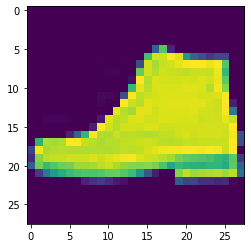

In [7]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
training_labels[42]
training_images[42]

In [8]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), #EX2 number of nuerons=1034
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [18]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2167 - accuracy: 0.9184
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2031 - accuracy: 0.9235
Epoch 3/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.1957 - accuracy: 0.9262
Reached about 80 percent accuracy so that is enough training!
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1958 - accuracy: 0.9261


In [11]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8719


[0.3542655110359192, 0.8719000220298767]

In [12]:
classifications = model.predict(test_images) #EX1
classifications[0]

array([7.4508998e-06, 3.3809699e-09, 7.0942349e-08, 7.5943518e-09, 8.6800981e-07, 3.6744020e-04, 1.5099992e-06, 2.2274254e-02, 8.9121770e-08, 9.7734833e-01], dtype=float32)

In [13]:
test_labels[0] #ankleboot

9

In [16]:
class myCallback(tf.keras.callbacks.Callback): #to stop tyraining at a certain metric 
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.2):
      print("\nReached about 80 percent accuracy so that is enough training!")
      self.model.stop_training = True